# Matplotlib and pylab inline

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
import cv2 as cv
import matplotlib.pyplot as plt

from matplotlib import rcParams

from modules.reading import *
from modules.standardization import invers_color
from skimage.filters.rank import enhance_contrast_percentile
from skimage.morphology import disk
from modules.other import find_contours_result

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

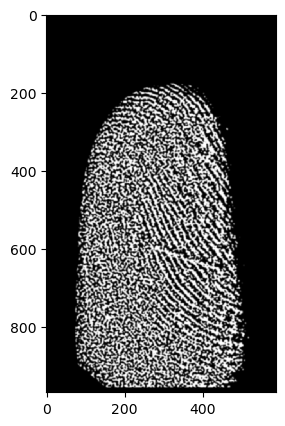

In [57]:
im = read_random_image(RAW_FILE_PATH_BADIM_NOISE)

inv_im = invers_color(im)

plt.imshow(inv_im)
pass

# Use enhance contrast percentile and threshold to find an fingerprint

## enchance contrast percentile

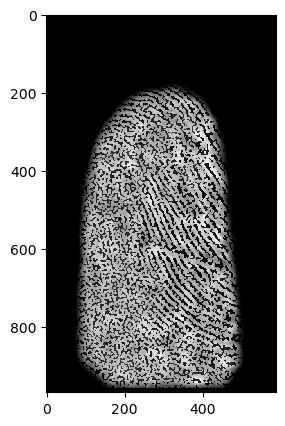

In [61]:
disk_ker = disk(20)
ecnh_im = enhance_contrast_percentile(inv_im, disk_ker, p0=0.1, p1=.5)

plt.imshow(ecnh_im)
pass

## image threshold

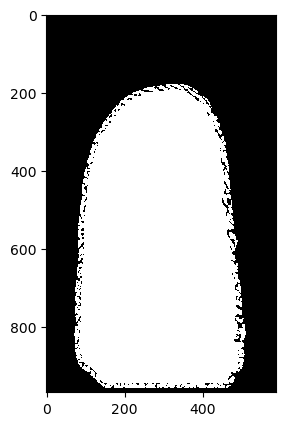

In [62]:
thresh = cv.threshold(ecnh_im, 0, 255, cv.THRESH_BINARY)[1]

plt.imshow(thresh)
pass

## Make fucniton for getting threshold of enhance contrast percentile image

In [63]:
def threshold_with_enhance(im, ker_ksize=20, p0=0.1, p1=.6):
    disk_ker = disk(ker_ksize)
    ecnh_im = enhance_contrast_percentile(inv_im, disk_ker, p0=p0, p1=p1)
    thresh = cv.threshold(ecnh_im, 0, 255, cv.THRESH_BINARY)[1]
    
    return thresh

## Test function

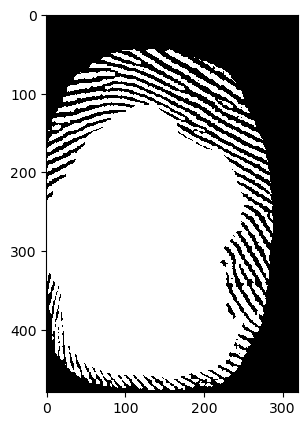

In [64]:
im = read_random_image(RAW_FILE_PATH_SCANS)
inv_im = invers_color(im)

thresh_im = threshold_with_enhance(inv_im)
plt.imshow(thresh_im)
pass

# Getting of mask

## Read and threshold image

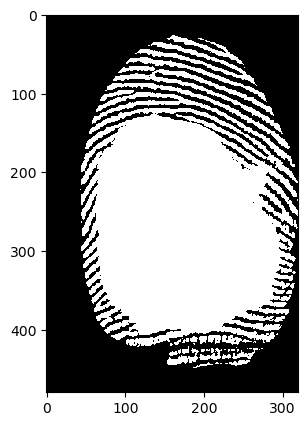

In [65]:
im = read_random_image(RAW_FILE_PATH_SCANS)
inv_im = invers_color(im)

thresh_im = threshold_with_enhance(inv_im)
plt.imshow(thresh_im)
pass

## Get and merge contours

In [66]:
res = cv.findContours(thresh_im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

contours, hierarchy = find_contours_result(res)
merge_contours = np.vstack(contours)

## Get convex hull and make mask

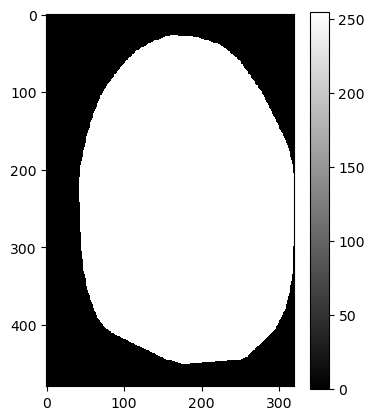

In [67]:
hull = cv.convexHull(merge_contours)
mask = np.zeros((inv_im.shape[0], inv_im.shape[1]), dtype=np.uint8)
mask = cv.fillConvexPoly(mask, hull, 255)

plt.imshow(mask, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

## Function for getting a mask

In [69]:
def get_mask(im, ker_ksize=20, p0=0.1, p1=.6):
    thresh_im = threshold_with_enhance(im, ker_ksize=ker_ksize, p0=p0, p1=p1)
    res = cv.findContours(thresh_im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    contours, hierarchy = find_contours_result(res)
    merge_contours = np.vstack(contours) 
    
    hull = cv.convexHull(merge_contours)
    
    mask = np.zeros((im.shape[0], im.shape[1]), dtype=np.uint8)
    mask = cv.fillConvexPoly(mask, hull, 255)
    
    return mask

## Test function

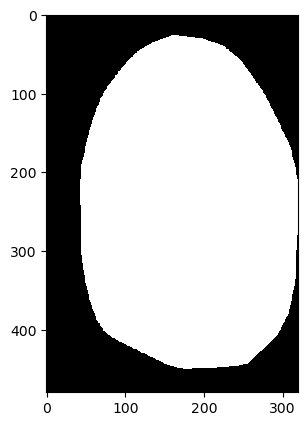

In [70]:
im = read_random_image(RAW_FILE_PATH_SCANS)
inv_im = invers_color(im)
mask = get_mask(inv_im)

plt.imshow(mask)